In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
import scipy.stats as stats
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image

In [14]:
diabetes_dataset = load_diabetes()
data = pd.DataFrame(diabetes_dataset.data,
                      columns=diabetes_dataset.feature_names)
data['Y'] = diabetes_dataset.target
data.shape

(442, 11)

In [15]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [17]:
X_ALL = data.drop('Y', axis=1)

In [18]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [20]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((353, 10), (89, 10))

In [21]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


In [22]:
data_cs11_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.544904e-18,-8.389468e-17,2.411344e-17,2.059690e-17,-5.927888e-17,-5.450642e-17,5.325052e-17,2.717786e-16,2.951385e-18,-2.025152e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


In [23]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

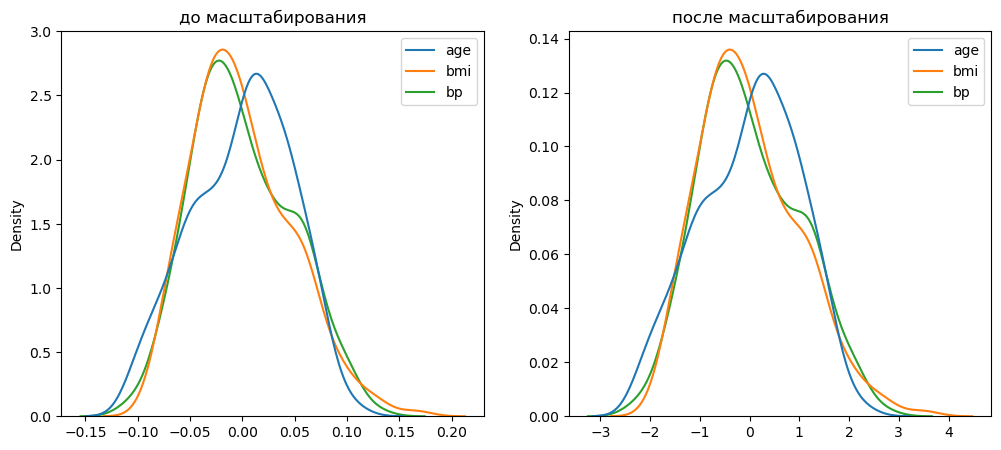

In [26]:
draw_kde(['age', 'bmi', 'bp'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [27]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [28]:
data_cs12_scaled_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,6.250902e-17,5.912803e-17,-2.940676e-17,2.327380e-17,-5.032172e-18,7.233748e-18,1.320945e-17,-4.088640e-17,-2.830597e-18,-2.115085e-17
std,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00
min,-2.262150e+00,-9.262261e-01,-1.915758e+00,-2.376419e+00,-2.685044e+00,-2.473851e+00,-2.166235e+00,-1.631226e+00,-2.620560e+00,-2.857210e+00
25%,-7.275311e-01,-9.262261e-01,-7.265375e-01,-7.148018e-01,-7.160882e-01,-6.376931e-01,-7.511056e-01,-8.554566e-01,-7.018040e-01,-6.494753e-01
50%,1.165093e-01,-9.262261e-01,-1.431463e-01,-1.368479e-01,-1.080284e-01,-1.254316e-01,-1.221591e-01,-7.968673e-02,-4.567258e-02,2.982775e-02
75%,7.303569e-01,1.079650e+00,6.646260e-01,7.300830e-01,5.579418e-01,6.196760e-01,5.854058e-01,6.960831e-01,6.808287e-01,6.242179e-01
max,2.341707e+00,1.079650e+00,3.514267e+00,2.752922e+00,3.192868e+00,4.205506e+00,3.808757e+00,3.868982e+00,2.746176e+00,2.747040e+00


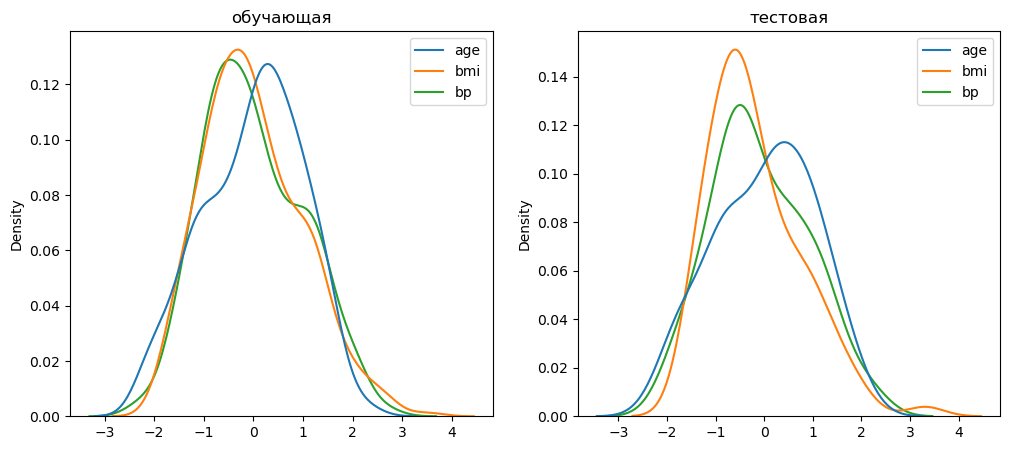

In [29]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['age', 'bmi', 'bp'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

In [30]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [31]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.000609,0.006569,-0.006701,-0.003481,-0.002909,-0.002648,0.003087,-0.004580,-0.002740,-0.005887
std,0.218484,0.499561,0.182567,0.194806,0.170483,0.151460,0.170187,0.182010,0.183364,0.174187
min,-0.491360,-0.461756,-0.352808,-0.463299,-0.456802,-0.370373,-0.362550,-0.296575,-0.488297,-0.509829
25%,-0.170526,-0.461756,-0.137932,-0.153440,-0.125522,-0.099207,-0.122419,-0.155532,-0.130769,-0.127253
50%,0.025307,-0.461756,-0.034626,-0.026679,-0.018379,-0.014795,-0.020445,-0.014488,-0.010239,-0.009829
75%,0.175307,0.538244,0.113101,0.142335,0.098616,0.092277,0.107844,0.126556,0.122149,0.096231
max,0.508640,0.538244,0.647192,0.536701,0.548124,0.629627,0.650608,0.703425,0.511703,0.490171


In [32]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [33]:
data_cs22_scaled_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,1.529309e-17,1.125949e-16,1.533240e-18,-1.258043e-18,-4.324523e-19,7.076492e-19,-7.076492e-18,2.516086e-18,1.454612e-18,-1.179415e-18
std,2.175175e-01,4.992429e-01,1.844226e-01,1.952335e-01,1.703699e-01,1.499275e-01,1.676018e-01,1.820694e-01,1.865975e-01,1.786893e-01
min,-4.913598e-01,-4.617564e-01,-3.528083e-01,-4.632992e-01,-4.568024e-01,-3.703726e-01,-3.625503e-01,-2.965754e-01,-4.882968e-01,-5.098292e-01
25%,-1.580264e-01,-4.617564e-01,-1.338000e-01,-1.393555e-01,-1.218270e-01,-9.547222e-02,-1.257082e-01,-1.555317e-01,-1.307692e-01,-1.158898e-01
50%,2.530689e-02,-4.617564e-01,-2.636200e-02,-2.667943e-02,-1.837871e-02,-1.877899e-02,-2.044506e-02,-1.448795e-02,-8.510309e-03,5.322345e-03
75%,1.586402e-01,5.382436e-01,1.223983e-01,1.423347e-01,9.492178e-02,9.277479e-02,9.797600e-02,1.265558e-01,1.268609e-01,1.113830e-01
max,5.086402e-01,5.382436e-01,6.471917e-01,5.367008e-01,5.431976e-01,6.296274e-01,6.374497e-01,7.034246e-01,5.117032e-01,4.901708e-01


In [34]:
data_cs22_scaled_test.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.003022,0.032626,-0.033280,-0.017290,-0.014449,-0.013150,0.015333,-0.022745,-0.013607,-0.029237
std,0.223507,0.502801,0.173467,0.193576,0.171407,0.157823,0.180543,0.181658,0.170500,0.153754
min,-0.474693,-0.461756,-0.286693,-0.406961,-0.363206,-0.361408,-0.270445,-0.296575,-0.345975,-0.358314
25%,-0.174693,-0.461756,-0.154461,-0.153440,-0.136605,-0.143281,-0.112550,-0.155532,-0.145708,-0.146193
50%,0.025307,-0.461756,-0.080081,-0.054848,-0.013453,-0.003839,-0.020445,-0.014488,-0.022553,-0.009829
75%,0.191974,0.538244,0.068679,0.114166,0.104774,0.090783,0.124292,0.126556,0.105142,0.065928
max,0.441974,0.538244,0.610002,0.438109,0.548124,0.493173,0.650608,0.408643,0.506981,0.429565


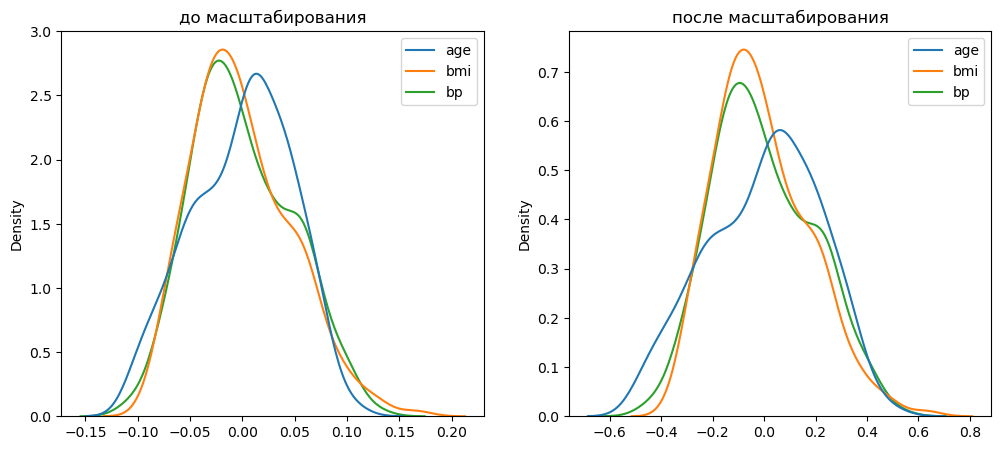

In [35]:
draw_kde(['age', 'bmi', 'bp'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

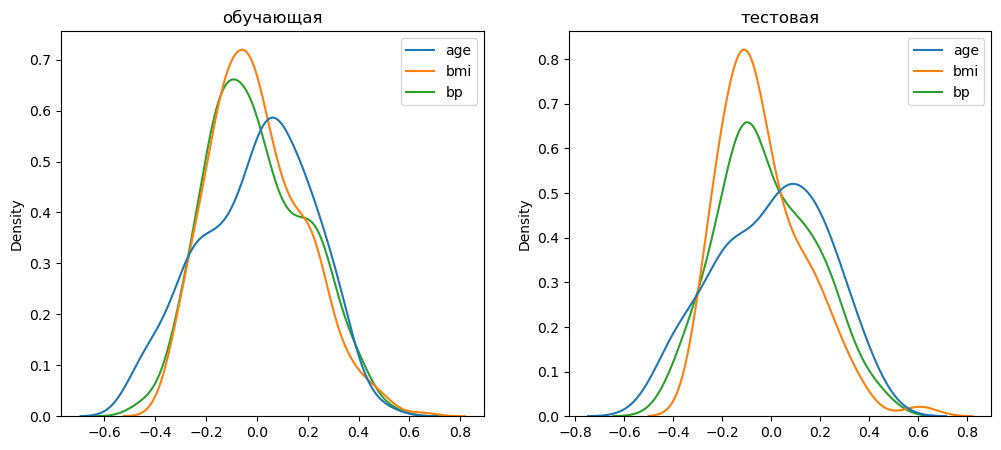

In [36]:
draw_kde(['age', 'bmi', 'bp'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [37]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

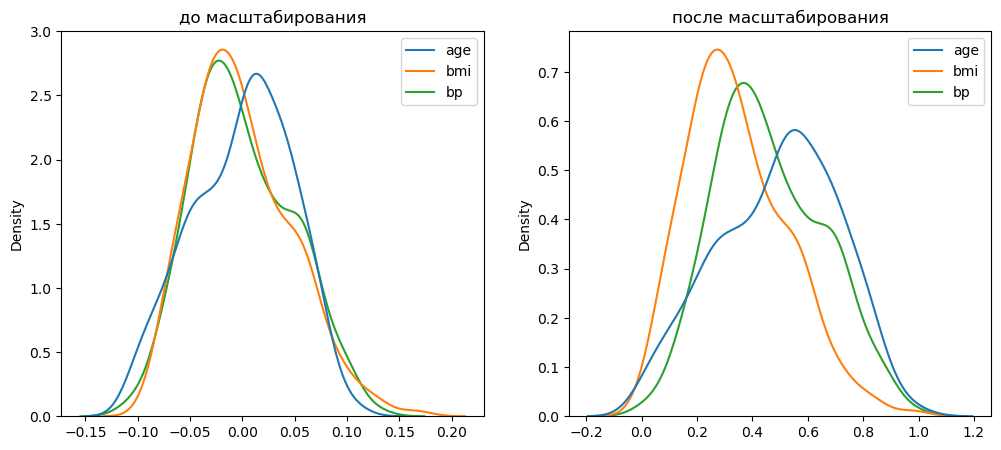

In [39]:
draw_kde(['age', 'bmi', 'bp'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

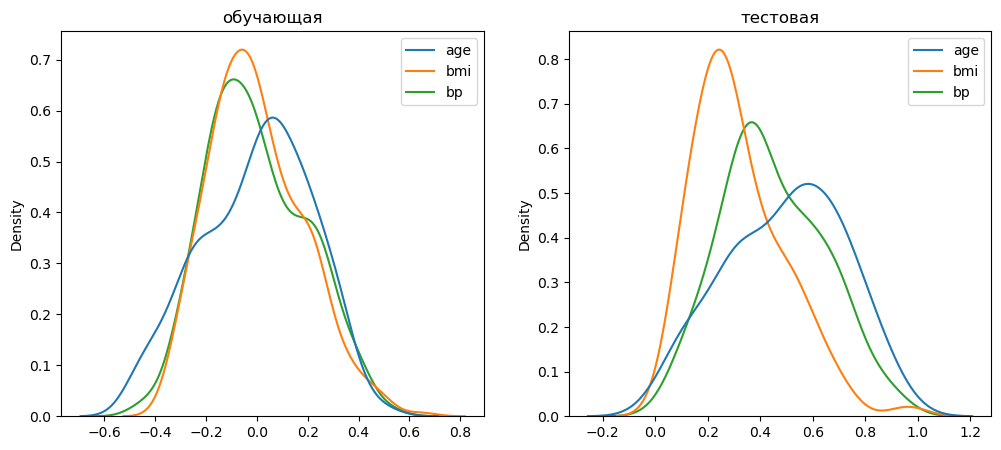

In [40]:
draw_kde(['age', 'bmi', 'bp'], data_cs22_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

In [41]:
x_col_list = ['age', 'bmi', 'bp']

In [42]:
data2 = pd.DataFrame(diabetes_dataset.data,
                      columns=diabetes_dataset.feature_names)[x_col_list]
data2['Y'] = diabetes_dataset.target
data2.shape

(442, 4)

In [46]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

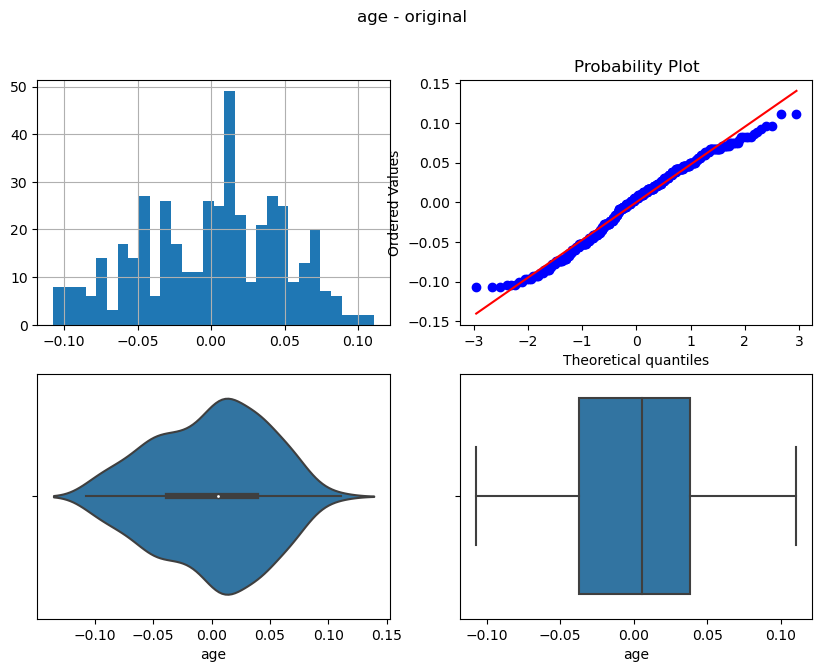

In [47]:
diagnostic_plots(data2, 'age', 'age - original')

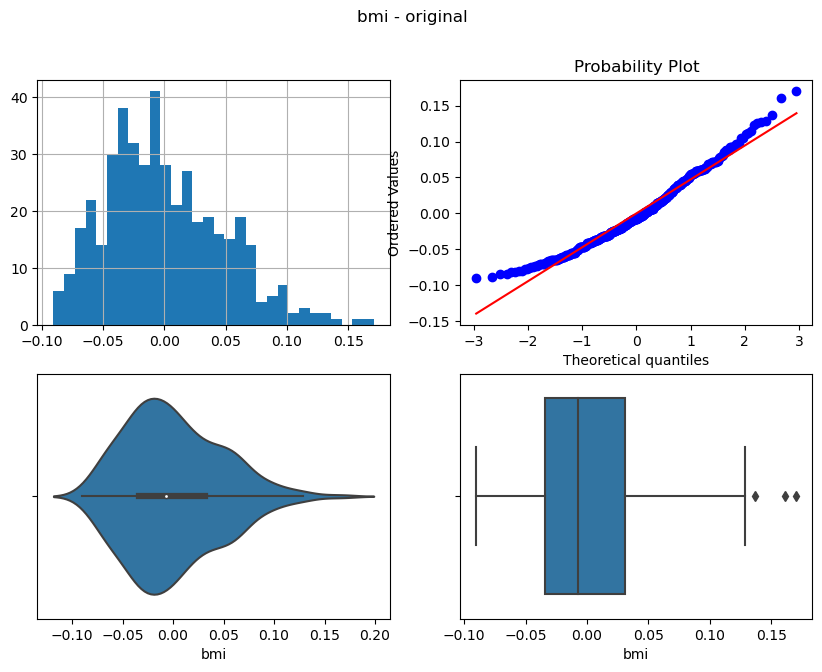

In [48]:
diagnostic_plots(data2, 'bmi', 'bmi - original')

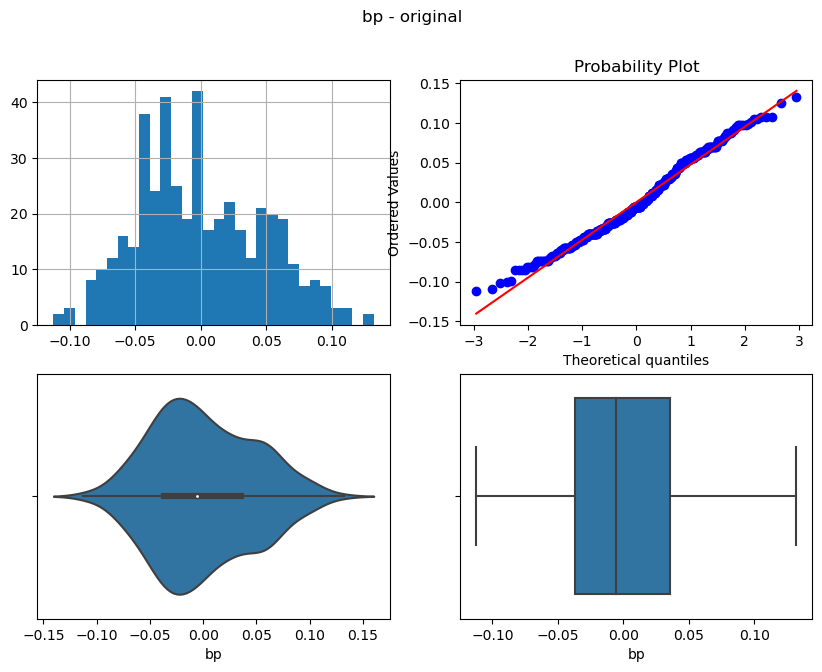

In [49]:
diagnostic_plots(data2, 'bp', 'bp - original')

In [53]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [54]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

In [55]:
#Удаление выбросов
data.shape

(442, 11)

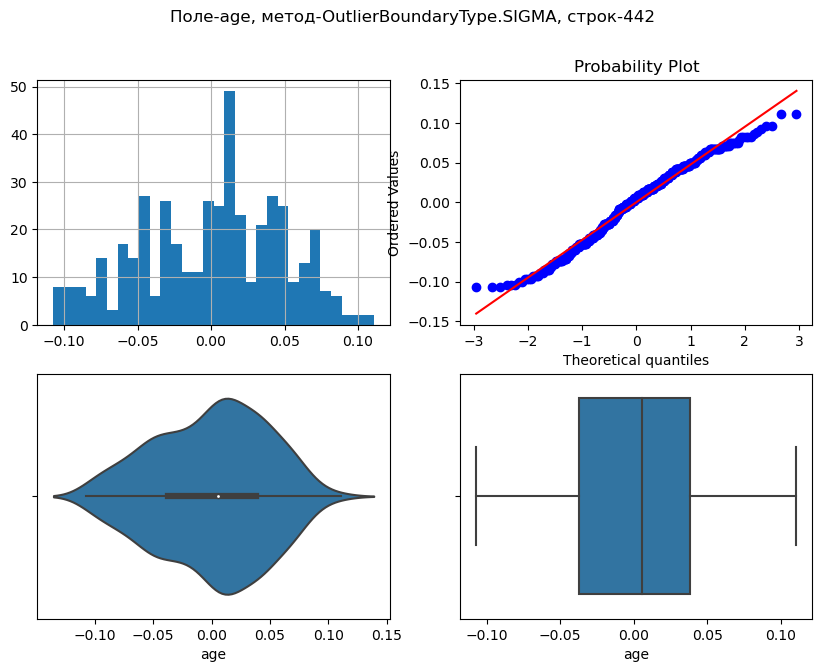

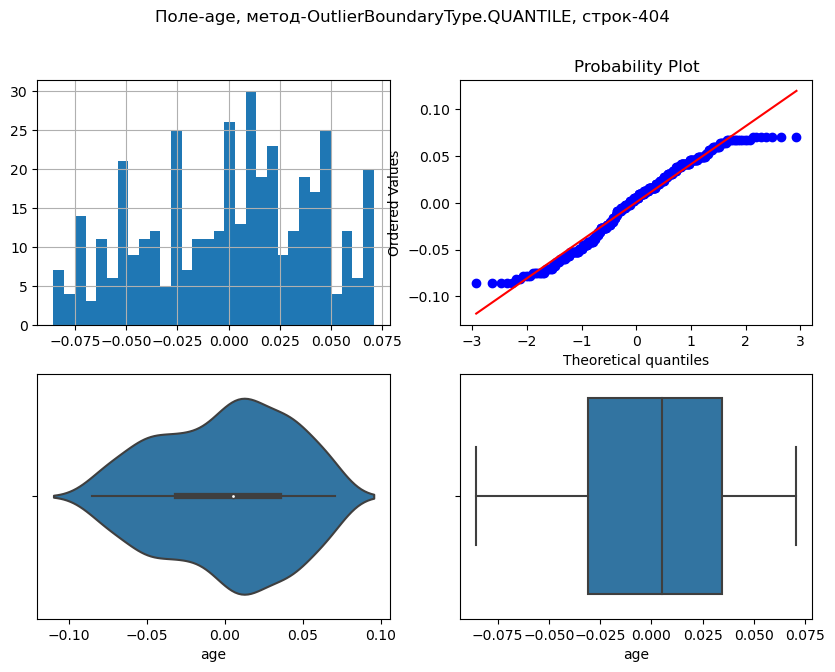

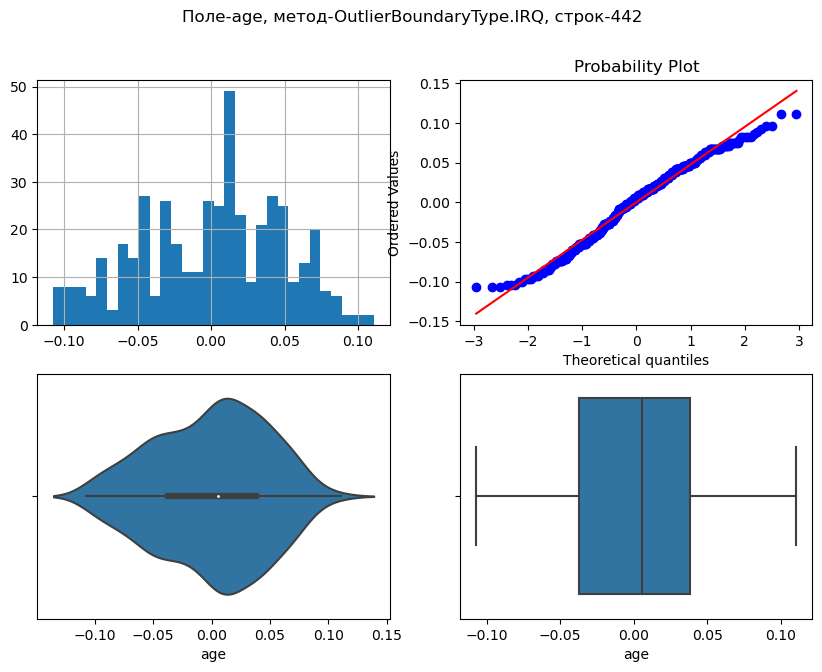

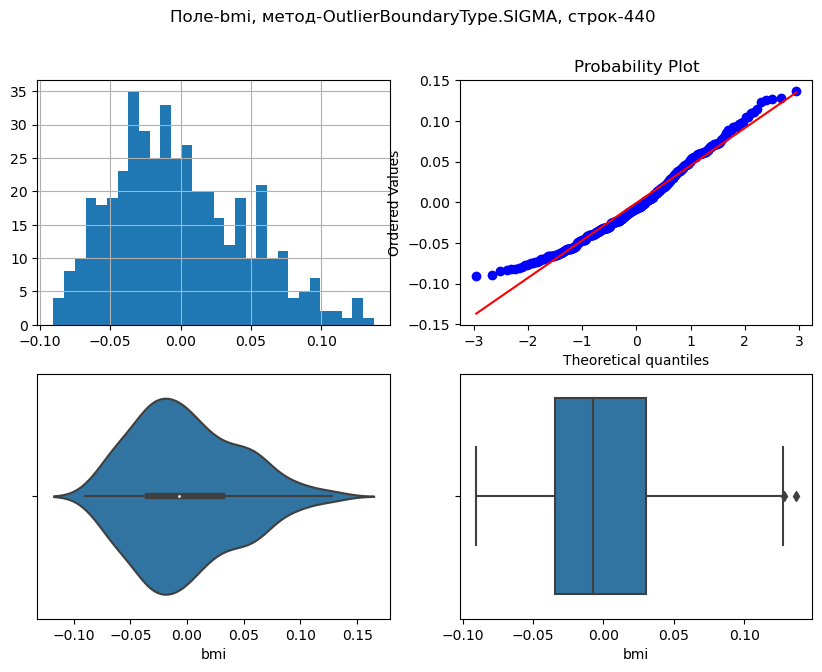

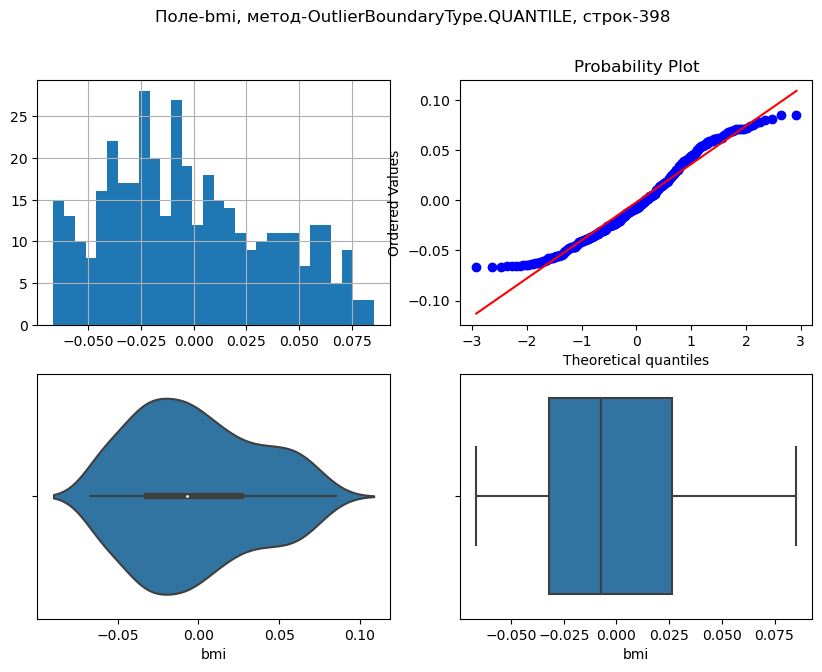

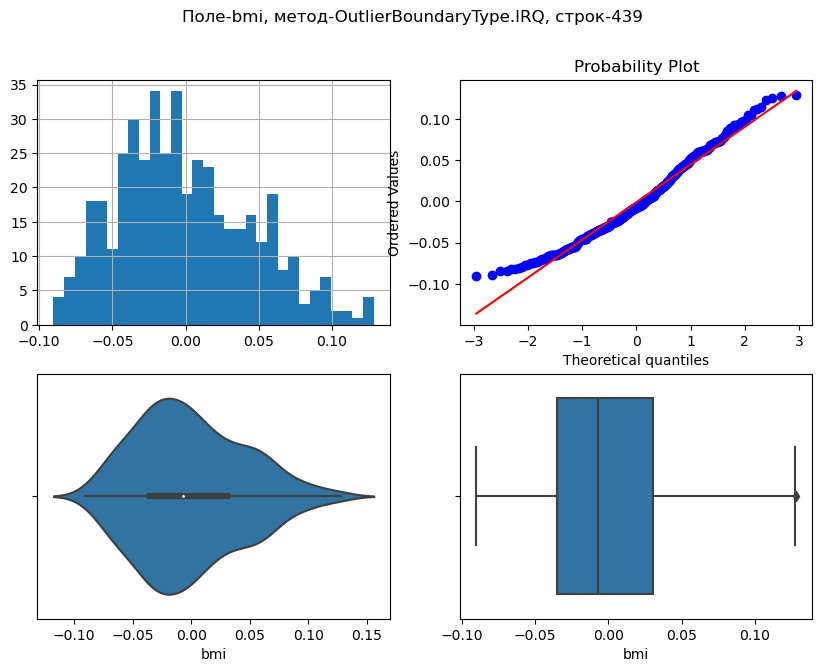

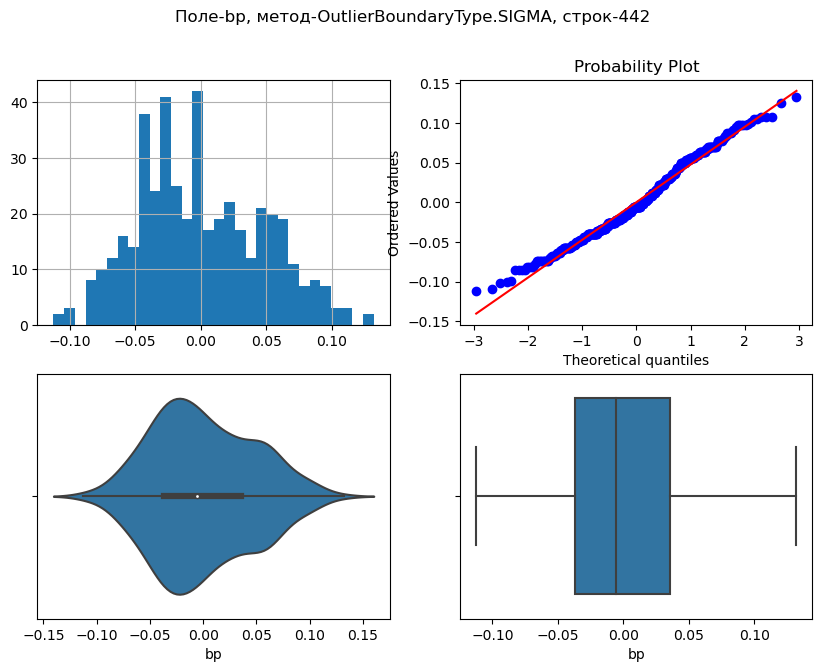

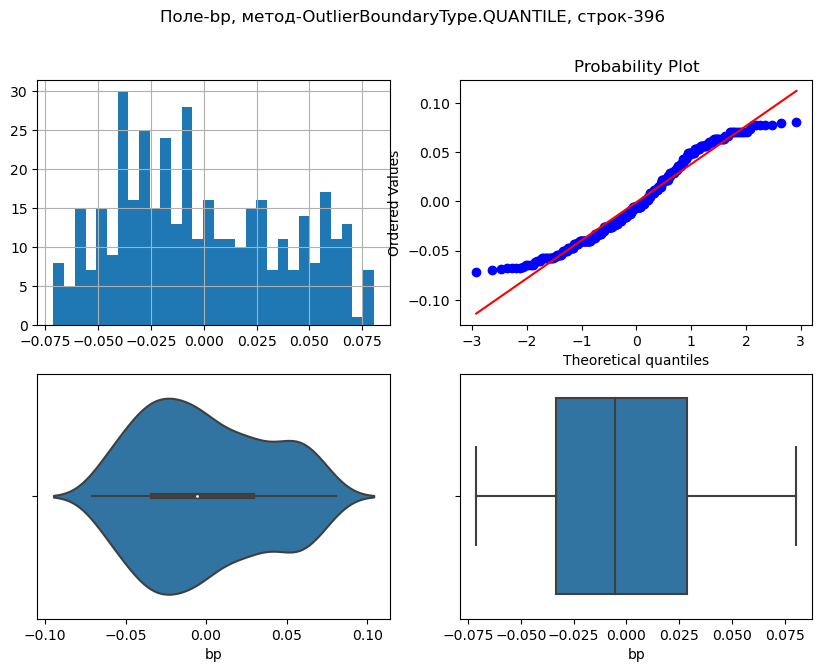

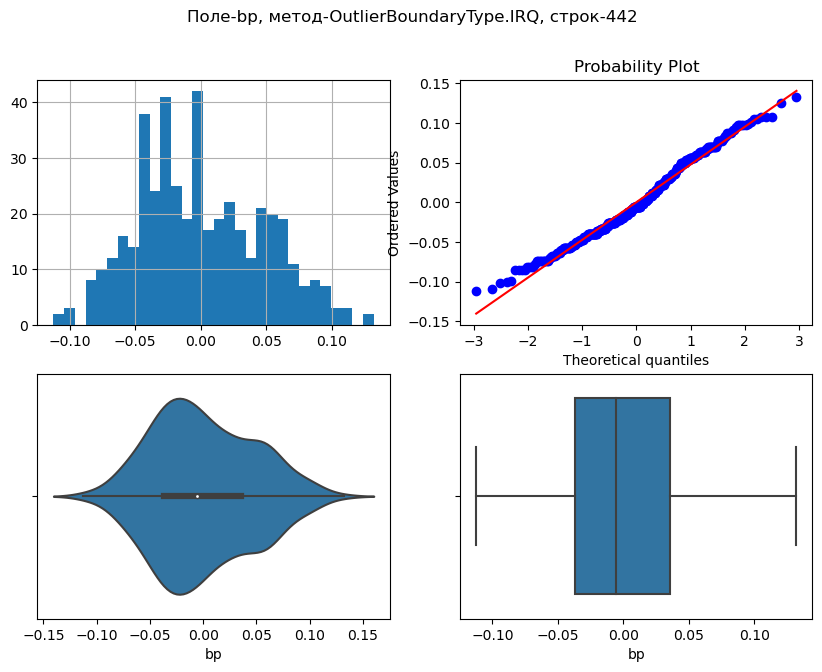

In [56]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

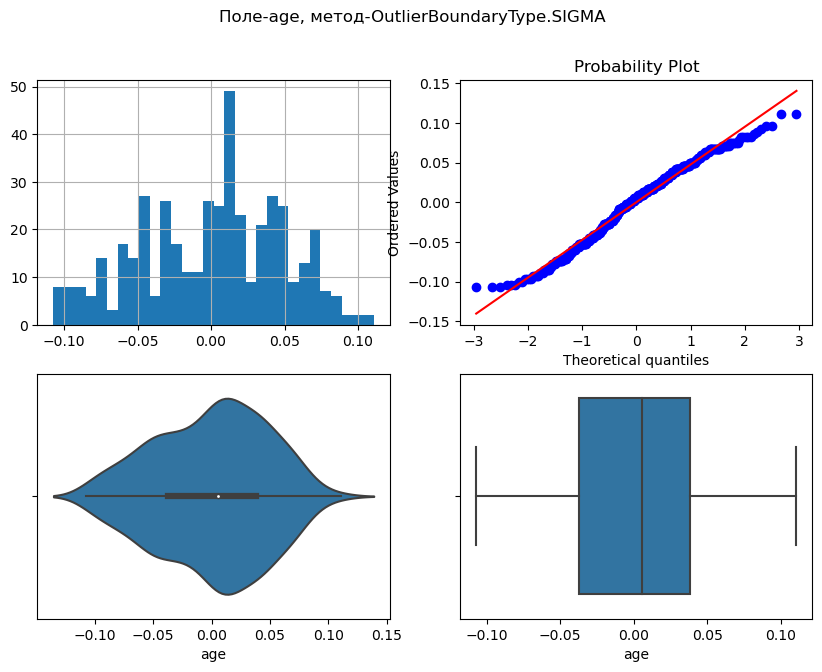

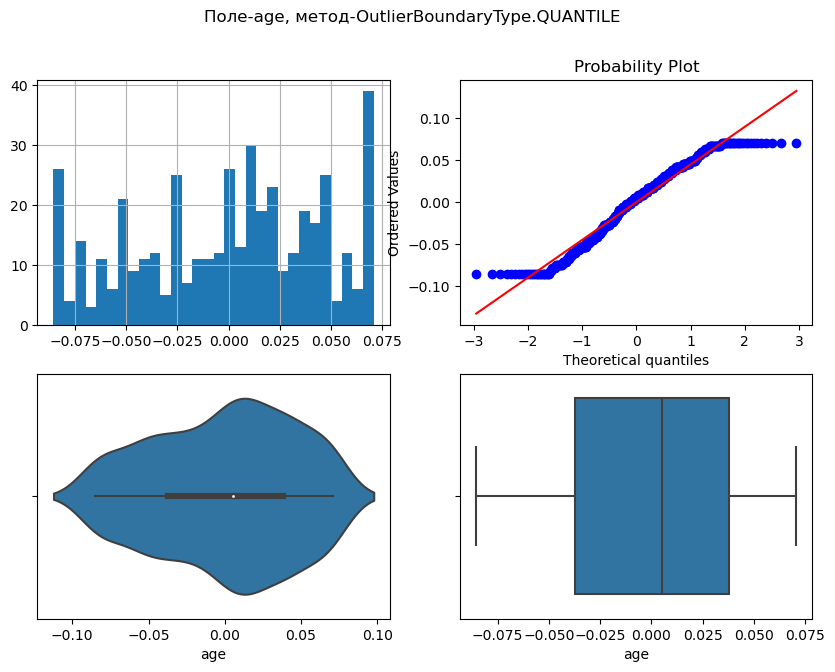

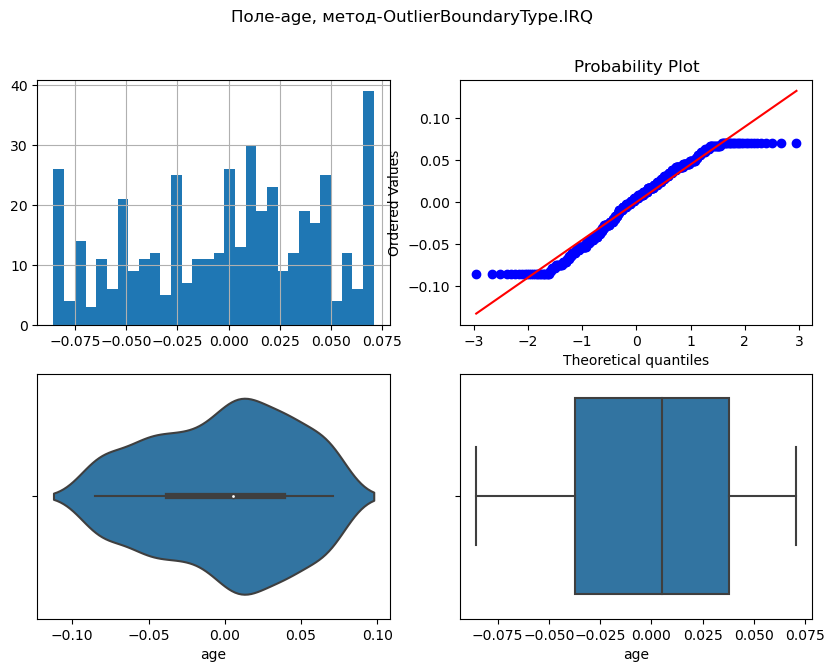

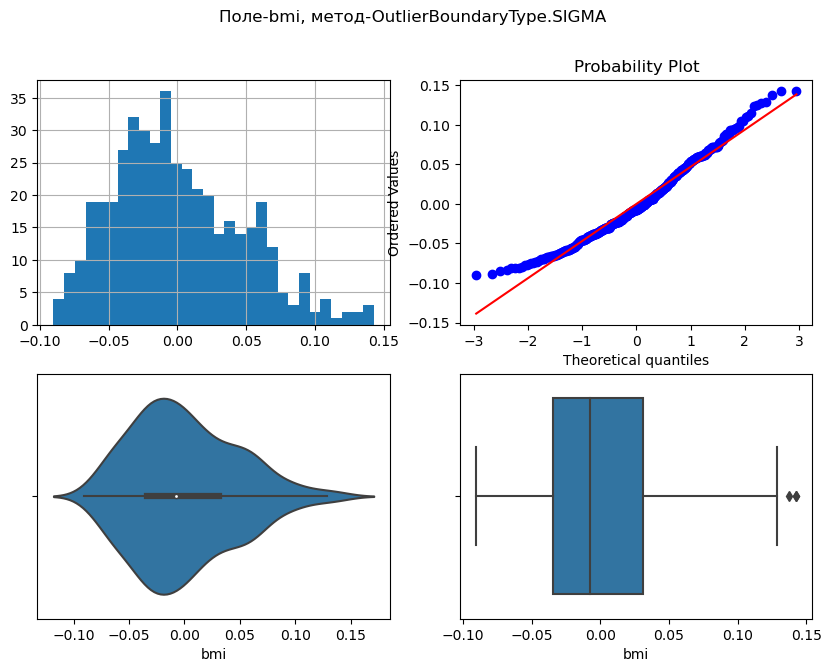

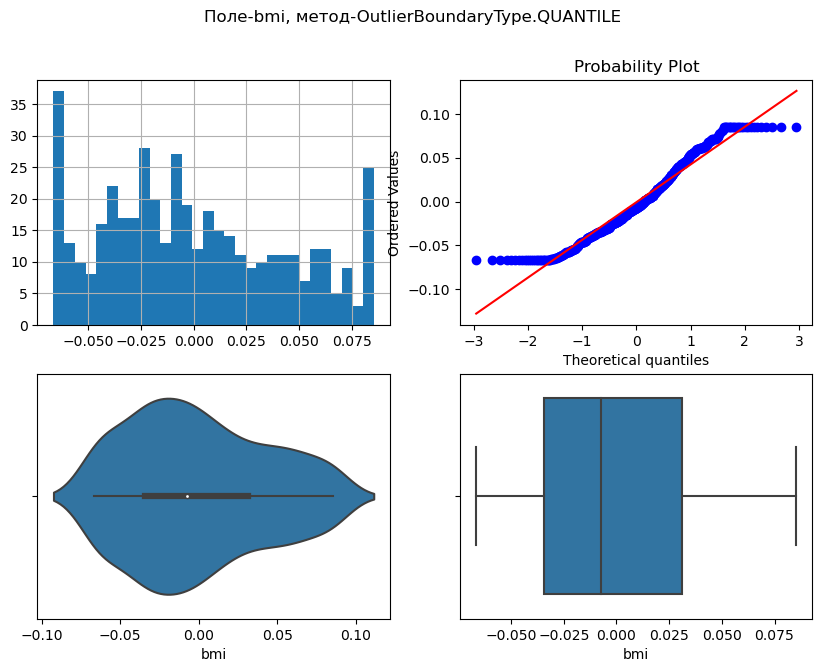

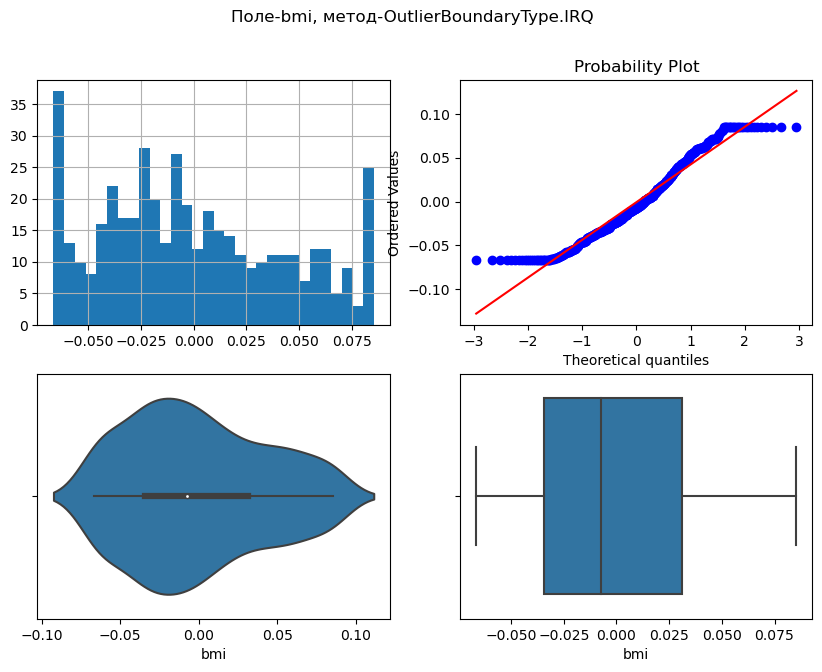

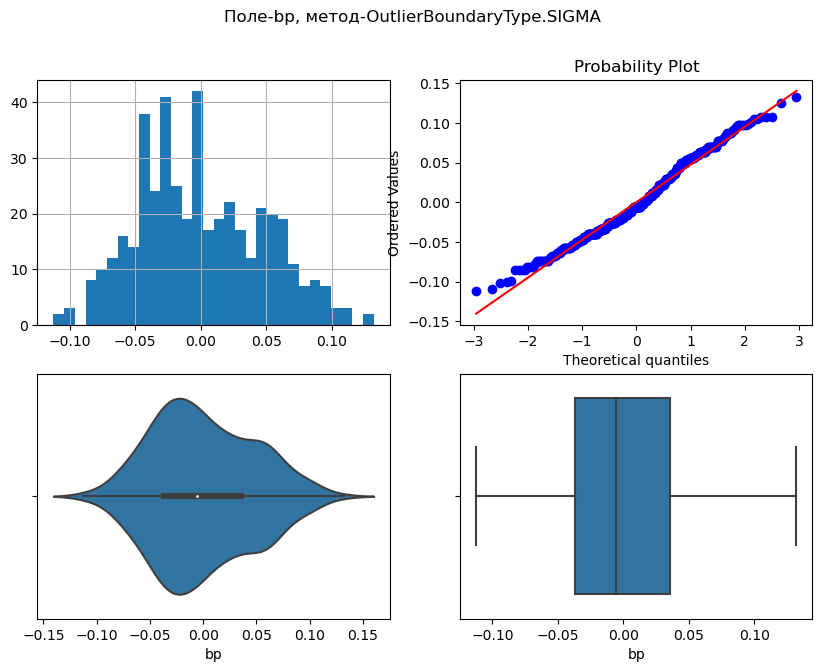

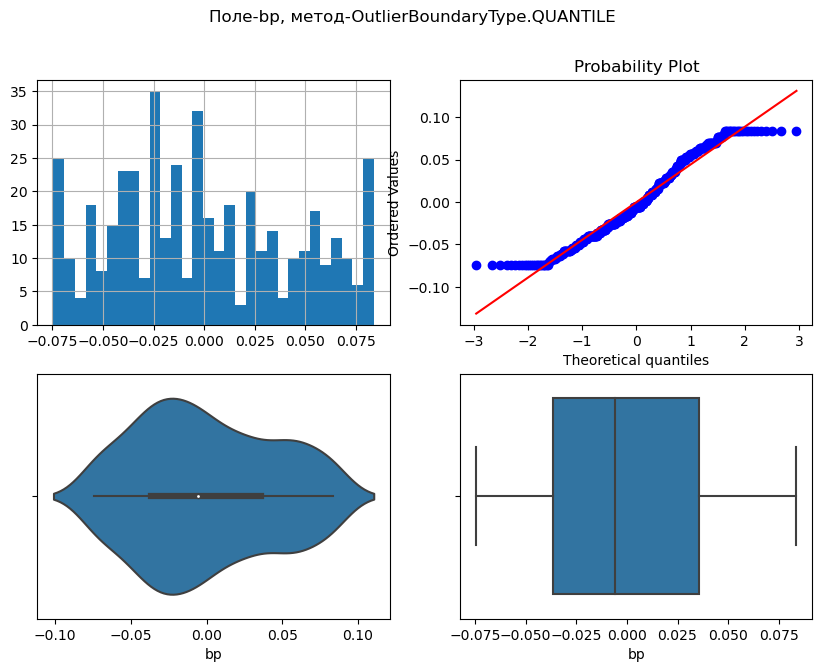

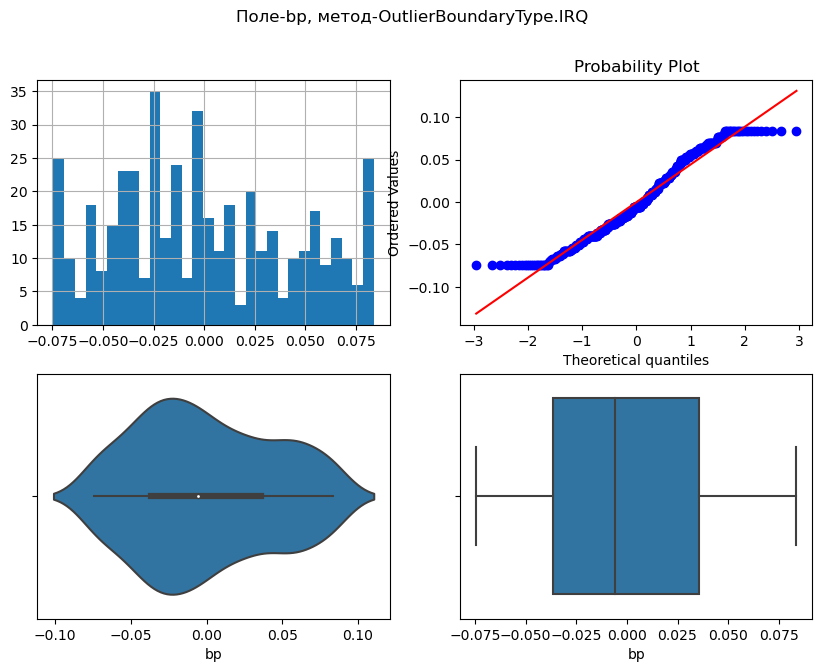

In [57]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

In [62]:
data3 = pd.read_csv('E:\\liu\МГТУ-刘贝贝\\研一\\ммо\\lab3\\uci-secom.csv')

In [63]:
data3.shape

(1567, 592)

In [65]:
data3.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [77]:
data3.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [81]:
# Сконвертируем дату и время в нужный формат
data3['dt'] = data3.apply(lambda x: pd.to_datetime(x['Time'], format='%Y/%m/%d %H:%M:%S'), axis=1)

In [85]:
# День
data3['day'] = data3['dt'].dt.day
# Месяц
data3['month'] = data3['dt'].dt.month
# Год
data3['year'] = data3['dt'].dt.year
# Часы
data3['hour'] = data3['dt'].dt.hour
#Минуты
data3['minute'] = data3['dt'].dt.minute
#Секунды
data3['second'] = data3['dt'].dt.second
#День недели 
data3['dayofweek'] = data3['dt'].dt.dayofweek

In [86]:
data3.head()

,Time,0,1,2,3,4,5,6,7,8,...,589,Pass/Fail,dt,day,month,year,hour,minute,second,dayofweek
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,-1,2008-07-19 11:55:00,19,7,2008,11,55,0,5
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,-1,2008-07-19 12:32:00,19,7,2008,12,32,0,5
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,1,2008-07-19 13:17:00,19,7,2008,13,17,0,5
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,-1,2008-07-19 14:43:00,19,7,2008,14,43,0,5
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,73.8432,-1,2008-07-19 15:22:00,19,7,2008,15,22,0,5


In [87]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    data3[f_new] = MinMaxScaler().fit_transform(data3[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'dayofweek_scaled']

In [88]:
data3.head()

,Time,0,1,2,3,4,5,6,7,8,...,minute,second,dayofweek,year_scaled,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,dayofweek_scaled
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,55,0,5,0.0,0.478261,0.545455,0.478261,0.932203,0.0,0.833333
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,32,0,5,0.0,0.478261,0.545455,0.521739,0.542373,0.0,0.833333
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,17,0,5,0.0,0.478261,0.545455,0.565217,0.288136,0.0,0.833333
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,43,0,5,0.0,0.478261,0.545455,0.608696,0.728814,0.0,0.833333
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,22,0,5,0.0,0.478261,0.545455,0.652174,0.372881,0.0,0.833333


In [3]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
diabetes = load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
diabetes_feature_names = diabetes['feature_names']
diabetes_x_df = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])

Text(0, 0.5, 'Взаимная информация')

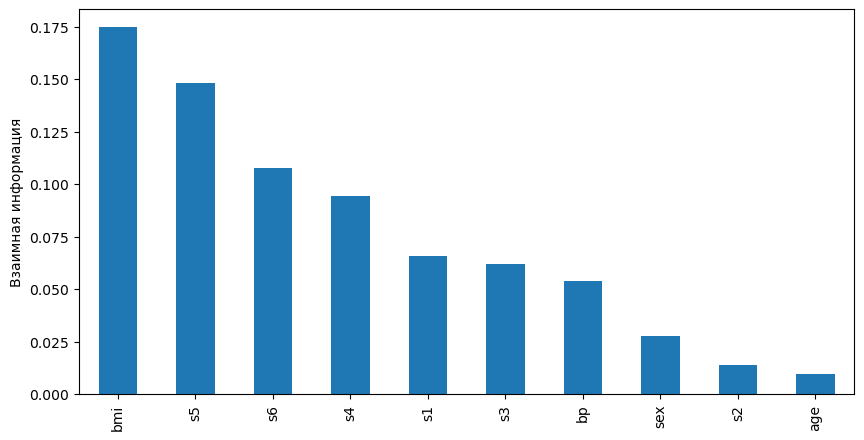

In [6]:
mi = mutual_info_regression(diabetes_X, diabetes_y)
mi = pd.Series(mi)
mi.index = diabetes_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [9]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(diabetes_X, diabetes_y)
list(zip(diabetes_feature_names, sel_mi.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', True),
 ('s2', False),
 ('s3', False),
 ('s4', True),
 ('s5', True),
 ('s6', True)]

In [12]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 482.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(diabetes_X, diabetes_y)
rfr1.fit(diabetes_X, diabetes_y)
gbr1.fit(diabetes_X, diabetes_y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.03876657, 0.00917085, 0.23849518, 0.08338531, 0.07635044,
        0.05544593, 0.07469134, 0.01343715, 0.34253774, 0.06771949]),
 1.0)

In [33]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

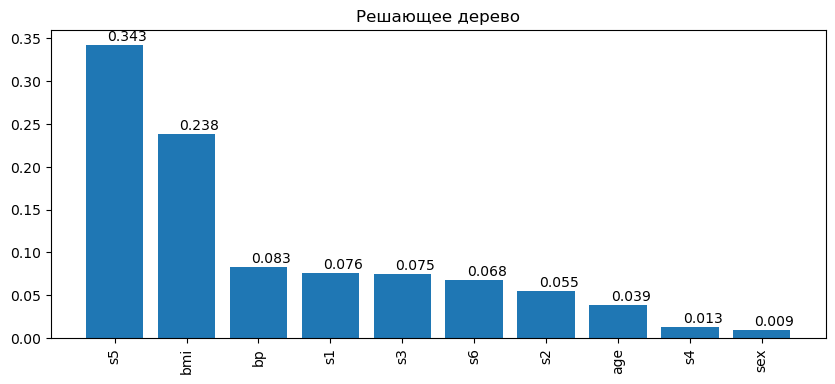

In [34]:
_,_=draw_feature_importances(dtr1, diabetes_x_df, 'Решающее дерево', figsize=(10,4))

In [37]:
list(zip(diabetes_feature_names, SelectFromModel(dtr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

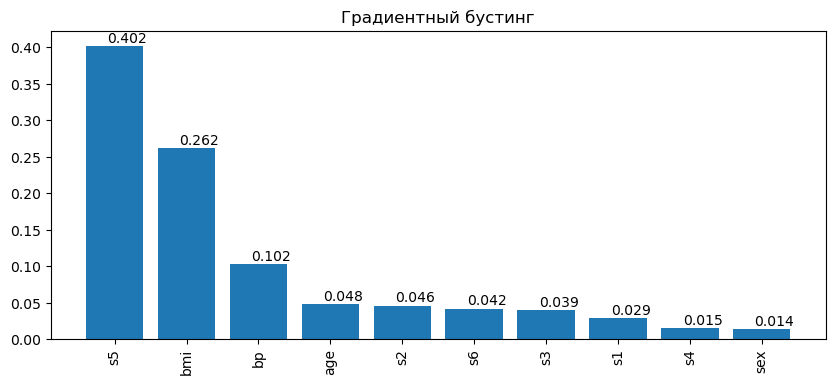

In [38]:
_,_=draw_feature_importances(gbr1, diabetes_x_df, 'Градиентный бустинг', figsize=(10,4))

In [39]:
list(zip(diabetes_feature_names, SelectFromModel(gbr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [40]:
list(zip(diabetes_feature_names, SelectFromModel(gbr1, threshold='0.25*mean').fit(diabetes_X, diabetes_y).get_support()))

[('age', True),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', True),
 ('s2', True),
 ('s3', True),
 ('s4', False),
 ('s5', True),
 ('s6', True)]

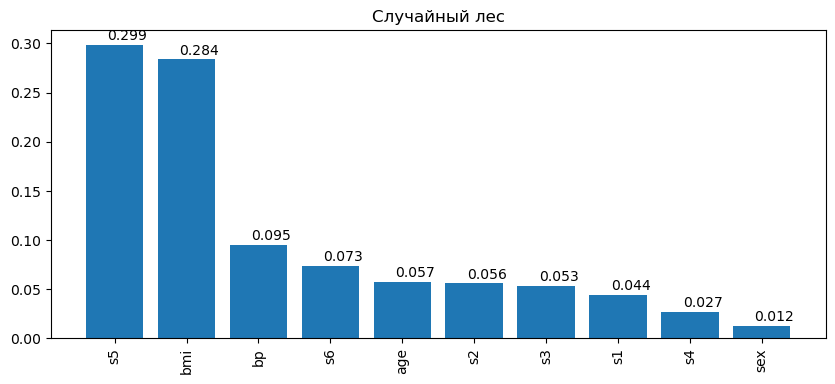

In [41]:
_,_=draw_feature_importances(rfr1, diabetes_x_df, 'Случайный лес', figsize=(10,4))

In [42]:
list(zip(diabetes_feature_names, SelectFromModel(rfr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [43]:
list(zip(diabetes_feature_names, SelectFromModel(rfr1, threshold='0.1*mean').fit(diabetes_X, diabetes_y).get_support()))

[('age', True),
 ('sex', True),
 ('bmi', True),
 ('bp', True),
 ('s1', True),
 ('s2', True),
 ('s3', True),
 ('s4', True),
 ('s5', True),
 ('s6', True)]